In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
from ML.Model import Predicter
from PreProcessing.DataManipulation import DataManipulation
import pickle

In [3]:
data = pd.read_csv("../data/deep-scenario.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Execution                      33530 non-null  int64  
 1   ScenarioID                     33530 non-null  object 
 2   Configuration_API_Description  33530 non-null  object 
 3   Attribute[TTC]                 33530 non-null  float64
 4   Attribute[DTO]                 33530 non-null  float64
 5   Attribute[Jerk]                33530 non-null  float64
 6   Attribute[COL]                 33530 non-null  bool   
 7   Attribute[COLT]                33530 non-null  object 
 8   Attribute[SAC]                 33530 non-null  float64
 9   reward                         33530 non-null  object 
 10  road                           33530 non-null  object 
 11  strategy                       33530 non-null  object 
 12  scenario                       33530 non-null 

## Pre Processing

In [4]:
dm = DataManipulation("../data/deep-scenario.csv")
dm.data.head(5)

,Execution,ScenarioID,Configuration_API_Description,Attribute[TTC],Attribute[DTO],Attribute[Jerk],Attribute[COL],Attribute[COLT],Attribute[SAC],reward,road,strategy,scenario
0,0,0_scenario_0,A red BoxTruck is overtaking (near) the ego ve...,100000.000000,24.810964,3.48,False,None,0.0,dto,road1,greedy,rain_day
1,0,0_scenario_1,A skyblue SUV is driving from the opposite dir...,100000.000000,8.654072,1.04,False,None,0.0,dto,road1,greedy,rain_day
2,0,0_scenario_2,A skyblue BoxTruck is driving ahead (near) of ...,2.103269,10.209357,4.98,False,None,0.0,dto,road1,greedy,rain_day
3,0,0_scenario_3,A black SchoolBus is driving ahead (near) of t...,7.452645,17.011425,2.42,False,None,0.0,dto,road1,greedy,rain_day
4,0,0_scenario_4,A red Hatchback is crossing the road (far) and...,2.885993,27.858975,2.84,False,None,0.0,dto,road1,greedy,rain_day


In [5]:
dm.addFromXML("../data/dataFromXML.csv")
dm.data.head(5)

,Execution,ScenarioID,Configuration_API_Description,Attribute[TTC],Attribute[DTO],Attribute[Jerk],Attribute[COL],Attribute[COLT],Attribute[SAC],reward,...,av3z,av4x,av4y,av4z,av5x,av5y,av5z,av6x,av6y,av6z
0,0,0_scenario_0,A red BoxTruck is overtaking (near) the ego ve...,100000.000000,24.810964,3.48,False,None,0.0,dto,...,0.0,-0.001,-0.002,0.0,0.003,-0.002,0.0,-0.000,-0.001,0.0
1,0,0_scenario_1,A skyblue SUV is driving from the opposite dir...,100000.000000,8.654072,1.04,False,None,0.0,dto,...,-0.0,-0.000,-0.000,0.0,0.001,-0.001,0.0,0.000,-0.002,0.0
2,0,0_scenario_2,A skyblue BoxTruck is driving ahead (near) of ...,2.103269,10.209357,4.98,False,None,0.0,dto,...,0.0,0.006,-0.003,0.0,0.012,-0.002,0.0,0.003,-0.001,-0.0
3,0,0_scenario_3,A black SchoolBus is driving ahead (near) of t...,7.452645,17.011425,2.42,False,None,0.0,dto,...,0.0,0.000,-0.000,0.0,0.000,-0.000,0.0,-0.001,-0.000,0.0
4,0,0_scenario_4,A red Hatchback is crossing the road (far) and...,2.885993,27.858975,2.84,False,None,0.0,dto,...,0.0,-0.007,-0.000,-0.0,0.005,0.001,0.0,0.004,0.002,-0.0


In [6]:
dm.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33530 entries, 0 to 33529
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Execution                      33530 non-null  int64  
 1   ScenarioID                     33530 non-null  object 
 2   Configuration_API_Description  33530 non-null  object 
 3   Attribute[TTC]                 33530 non-null  float64
 4   Attribute[DTO]                 33530 non-null  float64
 5   Attribute[Jerk]                33530 non-null  float64
 6   Attribute[COL]                 33530 non-null  bool   
 7   Attribute[COLT]                33530 non-null  object 
 8   Attribute[SAC]                 33530 non-null  float64
 9   reward                         33530 non-null  object 
 10  road                           33530 non-null  object 
 11  strategy                       33530 non-null  object 
 12  scenario                       33530 non-null 

In [7]:
dm.data.loc[dm.data["Attribute[COL]"] == True].value_counts(["Attribute[TTC]", "Attribute[COL]"])

Attribute[TTC]  Attribute[COL]
0.0             True              1050
dtype: int64

C:\Users\Yohannes\AppData\Local\Temp/ipykernel_2524/4175488753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dm.data.corr()["Attribute[COL]"].plot(kind="bar")


<AxesSubplot:>

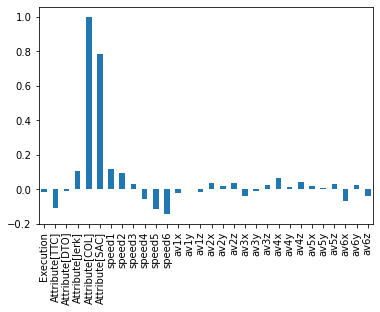

In [8]:
dm.data.corr()["Attribute[COL]"].plot(kind="bar")

In [9]:
dm.data.groupby(['strategy', 'Attribute[COL]']).size().unstack()

Attribute[COL],False,True
strategy,,
greedy,13070,192
random,13407,158
rl_based,6003,700


In [10]:
dm.data.value_counts("Attribute[COL]")

Attribute[COL]
False    32480
True      1050
dtype: int64

In [11]:
# our data is very unbalanced, we need to balance it
# we can do this by undersampling the majority class
dm.underSample(10000)
dm.data.value_counts("Attribute[COL]")

Attribute[COL]
False    10000
True      1050
dtype: int64

## Model

In [12]:
trainX, trainY, testX, testY = dm.splitTrainTest()
print(f"trainX:{trainX.shape}, trainY:{trainY.shape}, testX:{testX.shape}, testY:{testY.shape}")

splitting at 8840.
trainX:(8840, 30), trainY:(8840, 4), testX:(2210, 30), testY:(2210, 4)


In [13]:
trainX.head()

,Attribute[DTO],Attribute[Jerk],reward,road,strategy,scenario,speed1,speed2,speed3,speed4,...,av3z,av4x,av4y,av4z,av5x,av5y,av5z,av6x,av6y,av6z
17672,11.115775,4.60,dto,road4,random,sunny_night,1.645,1.327,0.996,0.033,...,-0.000,-0.006,-0.000,-0.007,0.002,-0.000,0.003,-0.000,-0.000,-0.000
33206,5.632980,7.08,ttc,road4,rl_based,rain_night,13.489,12.325,12.372,11.406,...,0.048,-0.000,0.014,-0.016,-0.002,0.038,0.000,0.001,0.018,-0.001
19238,5.755474,2.82,jerk,road2,random,rain_night,3.380,2.724,2.205,1.992,...,-0.000,0.002,0.003,-0.001,-0.000,0.001,0.000,0.005,-0.000,-0.003
6375,22.361135,6.40,jerk,road2,greedy,sunny_day,7.748,6.825,7.654,8.049,...,0.003,0.010,0.000,-0.007,-0.004,0.001,0.003,0.000,0.002,-0.000
30583,7.051690,6.16,jerk,road3,rl_based,sunny_day,5.823,6.090,4.819,3.868,...,-0.003,0.002,-0.051,-0.000,-0.008,0.001,-0.004,0.002,0.002,0.001


In [14]:
model = Predicter()
x, y = model.preProcess(trainX, trainY) # some last preprocessing (scaling and label encoding)
testX, testY = model.preProcess(testX, testY)

model.fit(x, y)

Scaler is fitted


c:\Users\Yohannes\anaconda3\envs\MasterThesis\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# print sample of x, y, testX, testY
print(f"x:{x[:2]},\n\ny:{y[:5]},\n\ntestX:{testX[:2]},\n\ntestY:{testY[:5]}")

x:[[-0.17636761 -0.21430771 -1.08528788 -1.19975485 -1.37339082 -1.64627613
  -1.60094743 -1.11421075 -0.77130207  0.13529001 -1.09232359 -0.01348654
   0.08776564  0.01304309  0.0122421   0.06794519  0.0034115  -0.25481403
   0.10755213 -0.30246538  0.10984041  0.12361256  0.13730256  0.02635185
   0.10474023  0.01053823]
 [-0.64918194  0.51685584  2.28910976  2.03185925  2.19412116  1.90631478
   1.64850282  1.37923473  0.49967998  0.44286341 -0.27819224 -0.26949041
  -0.94223151  0.3789119  -0.14018064  2.36692241  2.7871989  -0.01921155
   0.23317527 -0.67274568 -0.11192257  0.48525312 -0.0061277   0.1064035
   0.2838819  -0.05190008]],

y:[0 0 0 0 1],

testX:[[ 5.58567677e-01  7.46818565e-01 -5.76165238e-01 -1.34891287e-01
   2.16874058e-01  6.84945707e-01  8.58729128e-01  8.75243563e-01
   7.53876385e-01 -3.28350661e+00 -1.63507783e+00  6.33146224e-02
  -2.60874374e+00  3.52778414e-01 -9.53101929e-01 -2.14101183e+00
  -7.50530917e-01  1.37856769e-01 -2.45874916e+00  2.66726541e-0

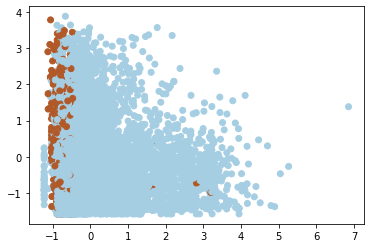

In [16]:
# plot scatter of x and y
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Paired)

In [17]:
pred = model.predict(testX)
score = model.getScore(pred, testY)

Total: 2210, number of collisions: 232
	TN: 1957 	| FP: 21 
	FN: 61 	| TP: 171
Accuracy: 0.96
Precision: 0.89
Recall: 0.74
F1: 0.81


In [18]:
# model_score = TN-FP-FN-TP
model_score = f"{score[0][0]}-{score[0][1]}-{score[1][0]}-{score[1][1]}"
model.saveModel("MLPClassifier", accuracy=model_score)

Model saved!


## Paramter Tuning

https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [23]:
curr_params = model.model.get_params()

# loop through all the parameters and change each value to a list of the value
curr_params = dict((key, [value]) for (key, value) in curr_params.items())
curr_params

{'activation': ['relu'],
 'alpha': [0.0001],
 'batch_size': ['auto'],
 'beta_1': [0.9],
 'beta_2': [0.999],
 'early_stopping': [False],
 'epsilon': [1e-08],
 'hidden_layer_sizes': [(100,)],
 'learning_rate': ['constant'],
 'learning_rate_init': [0.001],
 'max_fun': [15000],
 'max_iter': [200],
 'momentum': [0.9],
 'n_iter_no_change': [10],
 'nesterovs_momentum': [True],
 'power_t': [0.5],
 'random_state': [None],
 'shuffle': [True],
 'solver': ['adam'],
 'tol': [0.0001],
 'validation_fraction': [0.1],
 'verbose': [False],
 'warm_start': [False]}

In [24]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model.model, curr_params, n_jobs=-1, cv=5)
clf.fit(x, y)

c:\Users\Yohannes\anaconda3\envs\MasterThesis\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'batch_size': ['auto'], 'beta_1': [0.9],
                         'beta_2': [0.999], 'early_stopping': [False],
                         'epsilon': [1e-08], 'hidden_layer_sizes': [(100,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'max_fun': [15000],
                         'max_iter': [200], 'momentum': [0.9],
                         'n_iter_no_change': [10], 'nesterovs_momentum': [True],
                         'power_t': [0.5], 'random_state': [None],
                         'shuffle': [True], 'solver': ['adam'], 'tol': [0.0001],
                         'validation_fraction': [0.1], 'verbose': [False],
                         'warm_start': [False]})

In [25]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [26]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.963 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [27]:
y_true, y_pred = testY, clf.predict(testX)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1978
           1       0.85      0.75      0.80       232

    accuracy                           0.96      2210
   macro avg       0.91      0.87      0.89      2210
weighted avg       0.96      0.96      0.96      2210



In [28]:
score = clf.score(testX, testY)
score

0.960633484162896

Need to analyse, best params and default params are the same, why?